In [57]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [58]:
import plotly.graph_objects as go
import plotly.express as px

In [59]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [60]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

### pH against Alkalinity - Baseline

In [61]:
alk_baseline = xr.open_dataset('/Volumes/UnionSine/data_transfer/ssp126/ALK_baseline_ensemble1_ssp126_1m.nc', decode_times=True).sel(deptht=slice(0, 8))

In [62]:
ph_baseline = xr.open_mfdataset('/Volumes/UnionSine/data_transfer/ssp126/ph_base/*.nc')

In [63]:
sliced_alk_baseline = alk_baseline.where((-25 < alk_baseline.nav_lon) & (alk_baseline.nav_lon < 10) & (35 < alk_baseline.nav_lat) & (alk_baseline.nav_lat < 70), drop=True)

In [64]:
sliced_ph_baseline = ph_baseline.where((-25 < ph_baseline.nav_lon) & (ph_baseline.nav_lon < 10) & (35 < ph_baseline.nav_lat) & (ph_baseline.nav_lat < 70), drop=True)

In [65]:
start_date = "2080-01-01"
end_date = "2100-01-01"

alk_frame_baseline = sliced_alk_baseline.sel(time_counter=slice(start_date, end_date))
alk_frame_baseline = alk_frame_baseline.ALK.mean(dim=('y', 'x', 'deptht'))

In [66]:
start_date = "2080-01-01"
end_date = "2100-01-01"

ph_frame_baseline = sliced_ph_baseline.sel(time_counter=slice(start_date, end_date))
ph_frame_baseline = ph_frame_baseline.ph.mean(dim=('y', 'x'))

In [67]:
alk_frame_baseline = alk_frame_baseline.to_dataframe('ALK')
ph_frame_baseline = ph_frame_baseline.to_dataframe('ph')

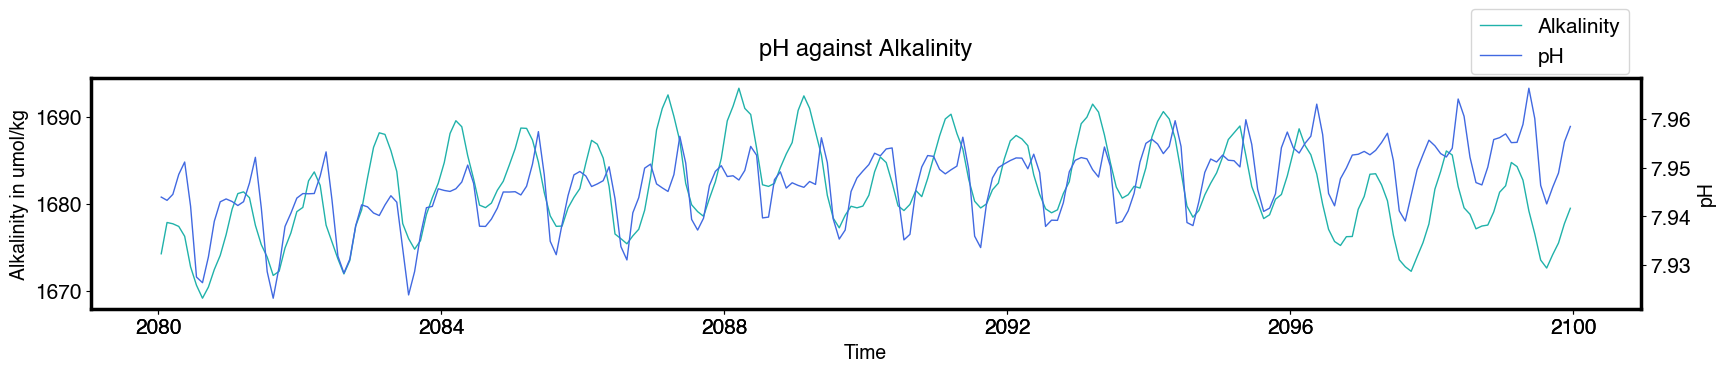

In [68]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(alk_frame_baseline.index, alk_frame_baseline.ALK, linewidth=1, color="lightseagreen", label = 'Alkalinity')
ax.set_ylabel('Alkalinity in umol/kg', fontsize=14)

ax2.plot(ph_frame_baseline.index, ph_frame_baseline.ph, linewidth=1, color="royalblue", label = 'pH')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('pH', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('pH against Alkalinity', fontname="Helvetica", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.81, 1), loc='center left')
plt.show()

### pH against Alkalinity - OAE

In [69]:
alk_oae = xr.open_dataset('/Volumes/UnionSine/data_transfer/ssp126/ALK_CDR_EU_coast_ssp126_1m.nc', decode_times=True).sel(deptht=slice(0, 8))

In [70]:
ph_oae = xr.open_mfdataset('/Volumes/UnionSine/data_transfer/ssp126/ph_oae/*.nc')

In [71]:
sliced_alk_oae = alk_oae.where((-25 < alk_oae.nav_lon) & (alk_oae.nav_lon < 10) & (35 < alk_oae.nav_lat) & (alk_oae.nav_lat < 70), drop=True)

In [72]:
sliced_ph_oae = ph_oae.where((-25 < ph_oae.nav_lon) & (ph_oae.nav_lon < 10) & (35 < ph_oae.nav_lat) & (ph_oae.nav_lat < 70), drop=True)

In [73]:
start_date = "2080-01-01"
end_date = "2100-01-01"

alk_frame_oae = sliced_alk_oae.sel(time_counter=slice(start_date, end_date))
alk_frame_oae = alk_frame_oae.ALK.mean(dim=('y', 'x', 'deptht'))

In [74]:
start_date = "2080-01-01"
end_date = "2100-01-01"

ph_frame_oae = sliced_ph_oae.sel(time_counter=slice(start_date, end_date))
ph_frame_oae = ph_frame_oae.ph.mean(dim=('y', 'x'))

In [75]:
alk_frame_oae = alk_frame_oae.to_dataframe('ALK')
ph_frame_oae = ph_frame_oae.to_dataframe('ph')

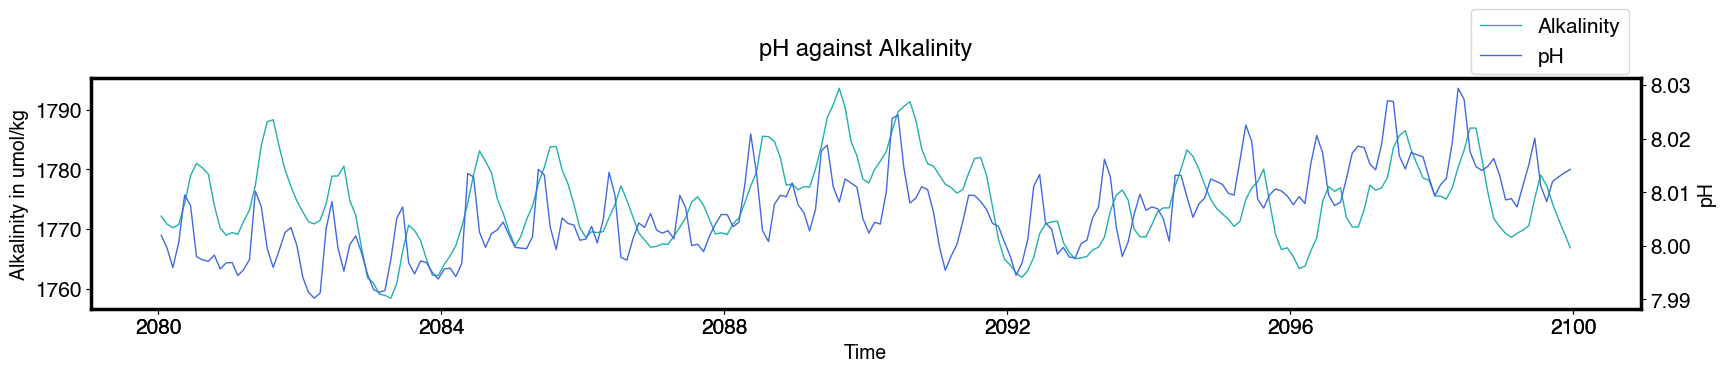

In [76]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(alk_frame_oae.index, alk_frame_oae.ALK, linewidth=1, color="lightseagreen", label = 'Alkalinity')
ax.set_ylabel('Alkalinity in umol/kg', fontsize=14)

ax2.plot(ph_frame_oae.index, ph_frame_oae.ph, linewidth=1, color="royalblue", label = 'pH')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('pH', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('pH against Alkalinity', fontname="Helvetica", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.81, 1), loc='center left')
plt.show()

### pH against CO2 Flux - Baseline

In [77]:
co2flux_baseline = xr.open_dataset('/Volumes/UnionSine/data_transfer/ssp126/CO2flux_baseline_ensemble1_ssp126_1m.nc')

In [78]:
sliced_co2flux_baseline = co2flux_baseline.where((-25 < co2flux_baseline.nav_lon) & (co2flux_baseline.nav_lon < 10) & (35 < co2flux_baseline.nav_lat) & (co2flux_baseline.nav_lat < 70), drop=True)

In [79]:
start_date = "2080-01-01"
end_date = "2100-01-01"

co2flux_frame_baseline = sliced_co2flux_baseline.sel(time_counter=slice(start_date, end_date))
co2flux_frame_baseline = co2flux_frame_baseline.co2flux_cpl.mean(dim=('y', 'x'))

In [80]:
co2flux_frame_baseline = co2flux_frame_baseline.to_dataframe('co2flux_cpl')

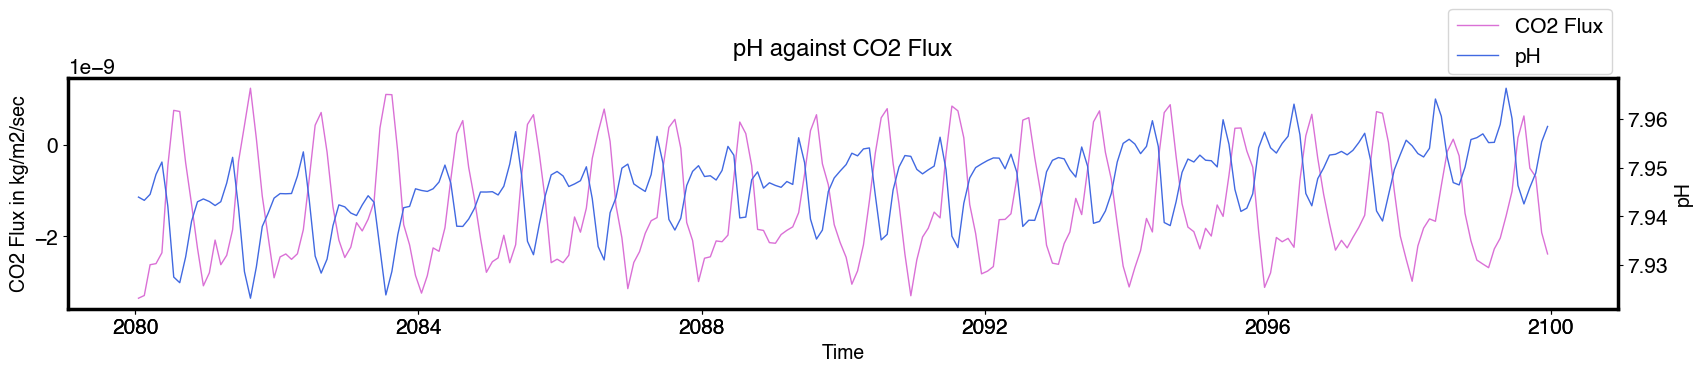

In [81]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(co2flux_frame_baseline.index, co2flux_frame_baseline.co2flux_cpl, linewidth=1, color="orchid", label = 'CO2 Flux')
ax.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)

ax2.plot(ph_frame_baseline.index, ph_frame_baseline.ph, linewidth=1, color="royalblue", label = 'pH')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('pH', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('pH against CO2 Flux', fontname="Helvetica", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.81, 1), loc='center left')
plt.show()

### pH against CO2 Flux - OAE

In [82]:
co2flux_oae = xr.open_dataset('/Volumes/UnionSine/data_transfer/ssp126/CO2flux_CDR_EU_coast_ssp126_1m.nc')

In [83]:
sliced_co2flux_oae = co2flux_oae.where((-25 < co2flux_oae.nav_lon) & (co2flux_oae.nav_lon < 10) & (35 < co2flux_oae.nav_lat) & (co2flux_oae.nav_lat < 70), drop=True)

In [84]:
start_date = "2080-01-01"
end_date = "2100-01-01"

co2flux_frame_oae = sliced_co2flux_oae.sel(time_counter=slice(start_date, end_date))
co2flux_frame_oae = co2flux_frame_oae.co2flux_cpl.mean(dim=('y', 'x'))

In [85]:
co2flux_frame_oae = co2flux_frame_oae.to_dataframe('co2flux_cpl')

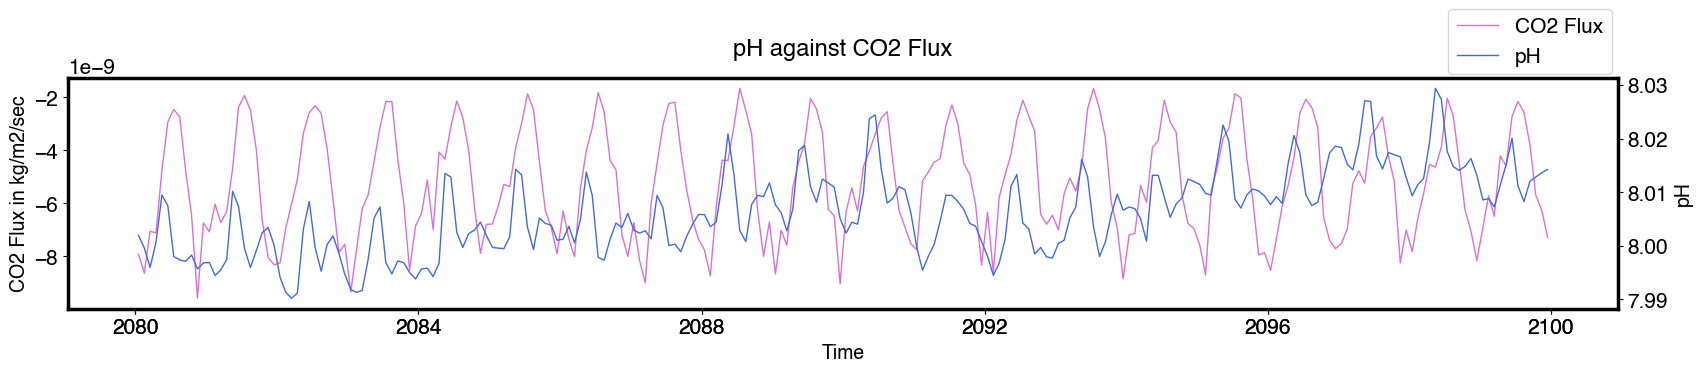

In [53]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(co2flux_frame_oae.index, co2flux_frame_oae.co2flux_cpl, linewidth=1, color="orchid", label = 'CO2 Flux')
ax.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)

ax2.plot(ph_frame_oae.index, ph_frame_oae.ph, linewidth=1, color="royalblue", label = 'pH')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('pH', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('pH against CO2 Flux', fontname="Helvetica", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.81, 1), loc='center left')
plt.show()